Epoch 1/10
34/34 [==============================] - 2s 2ms/step - loss: 317559616.0000
Epoch 2/10
34/34 [==============================] - 0s 2ms/step - loss: 316551136.0000
Epoch 3/10
34/34 [==============================] - 0s 2ms/step - loss: 310539136.0000
Epoch 4/10
34/34 [==============================] - 0s 2ms/step - loss: 288623712.0000
Epoch 5/10
34/34 [==============================] - 0s 3ms/step - loss: 239206880.0000
Epoch 6/10
34/34 [==============================] - 0s 2ms/step - loss: 171026192.0000
Epoch 7/10
34/34 [==============================] - 0s 2ms/step - loss: 132459784.0000
Epoch 8/10
34/34 [==============================] - 0s 2ms/step - loss: 125927808.0000
Epoch 9/10
34/34 [==============================] - 0s 2ms/step - loss: 123150280.0000
Epoch 10/10
9/9 [==============================] - 0s 2ms/step - loss: 126503576.0000
Test loss: 126503576.0
9/9 [==============================] - 0s 2ms/step
[[ 9675.083 ]
 [10075.248 ]
 [18268.387 ]
 [16125.027 ]
 

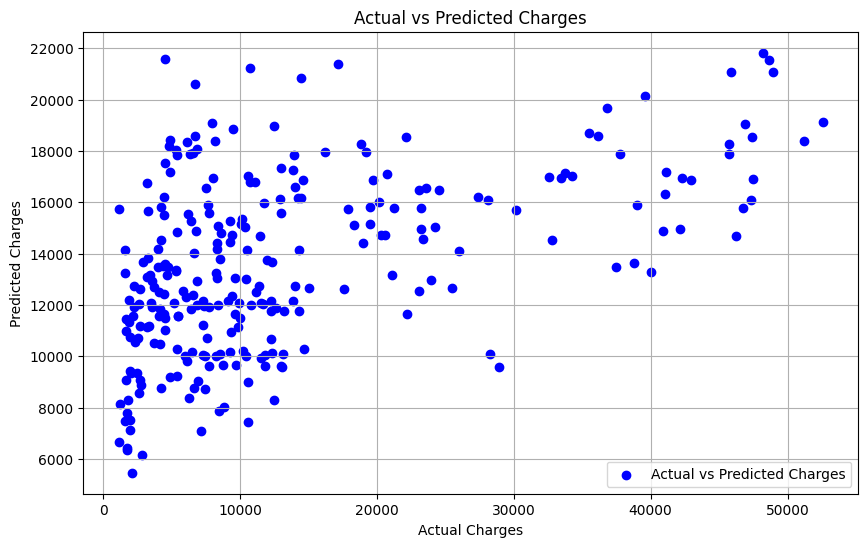

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('customer_data.csv')  # Update 'your_dataset.csv' with the path to your dataset file

# Preprocess data
data['sex'] = data['sex'].map({'male': 0, 'female': 1})
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})
data['region'] = data['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

# Split data into features and target variable
X = data.drop(columns=['charges'])
y = data['charges']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=2, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
test_loss = model.evaluate(X_test_reshaped, y_test)
print('Test loss:', test_loss)

# Predict customer lifetime value
predictions = model.predict(X_test_reshaped)
print(predictions)



# Plot actual charges vs predicted charges
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Actual vs Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.legend()
plt.grid(True)
plt.show()